In [126]:
import sys

sys.path.append('../../code/')
import os
import json
from datetime import datetime
import time
from math import *



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import igraph as ig


from seaborn.apionly import color_palette

from load_data import load_citation_network_igraph, case_info
from helper_functions import rankdata_reverse

from dim_reduction import *
from viz import *
from color_palettes import *



%load_ext autoreload
%autoreload 2
%matplotlib inline

data_dir = '../../data/'
court_name = 'scotus'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load into igraph

In [2]:
g_d = load_citation_network_igraph(data_dir, 'scotus', directed=True)
# g_u = load_citation_network_igraph(data_dir, 'scotus', directed=False)

0 seconds for 250465 edges


In [3]:
case_metrics = pd.DataFrame(index=range(len(g_d.vs)))
case_metrics['id'] = g_d.vs['name']
case_metrics['year'] = g_d.vs['year']


# run on directed graph
case_metrics['authority_d'] = g_d.authority_score()
case_metrics['indegree_d'] = g_d.indegree()
case_metrics['outdegree_d'] = g_d.outdegree()
case_metrics['hubs_d'] = g_d.hub_score()
case_metrics['betweenness_d'] = g_d.betweenness()
case_metrics['eigen_d'] = g_d.eigenvector_centrality()
# case_metrics['closeness_d'] = g_d.closeness()
case_metrics['pagerank_d'] = g_d.pagerank()

# # run on undirected graph
# case_metrics['authority_u'] = g_u.authority_score()
# case_metrics['indegree_u'] = g_u.indegree()
# case_metrics['outdegree_u'] = g_u.outdegree()
# case_metrics['hubs_u'] = g_u.hub_score()
# case_metrics['betweenness_u'] = g_u.betweenness()
# case_metrics['eigen_u'] = g_u.eigenvector_centrality()
# case_metrics['closeness_u'] = g_u.closeness()
# case_metrics['pagerank_u'] = g_u.pagerank()

In [4]:
case_metrics

,id,year,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,pagerank_d
0,100000,1922,1.464909e-05,1,0,1.126011e-16,0.000000,5.136952e-11,0.000011
1,100001,1922,9.262362e-06,1,0,1.126011e-16,0.000000,3.756351e-12,0.000014
2,100002,1922,4.501513e-03,7,3,2.359661e-04,14407.810468,1.442598e-07,0.000015
3,100003,1922,6.525035e-03,14,2,2.717687e-03,4220.797681,5.368482e-07,0.000027
4,100004,1922,4.490624e-04,4,1,1.349067e-04,0.000000,1.012862e-06,0.000019
5,100005,1922,3.008944e-03,9,12,6.367995e-03,62883.886953,4.601221e-06,0.000029
6,100006,1922,8.728483e-05,5,2,7.744271e-05,5540.311615,8.635227e-08,0.000036
7,100007,1922,3.056307e-03,21,7,1.319972e-03,71883.418263,6.853056e-06,0.000053
8,100008,1922,5.469286e-17,0,0,1.126011e-16,0.000000,0.000000e+00,0.000010
9,100009,1922,2.788087e-03,21,12,2.004272e-03,23407.837089,4.076218e-06,0.000049


In [9]:
# put metrics in data frame

metrics = case_metrics.columns.tolist()[2:]
X = case_metrics[metrics]

In [18]:
# PCA of metrics

U, D, V = get_PCA(X, scale=True)
scores = np.dot(U, np.diag(D))

In [113]:
# cases colored by year

case_years = case_metrics['year'].tolist() # case years
start_year = min(case_years)
years0 = [y -  start_year for y in case_years] # case years beginning at zero

year_palette =  color_palette("PuBu", max(years0) +1 )

case_year_colors = [year_palette[y] for y in years0]

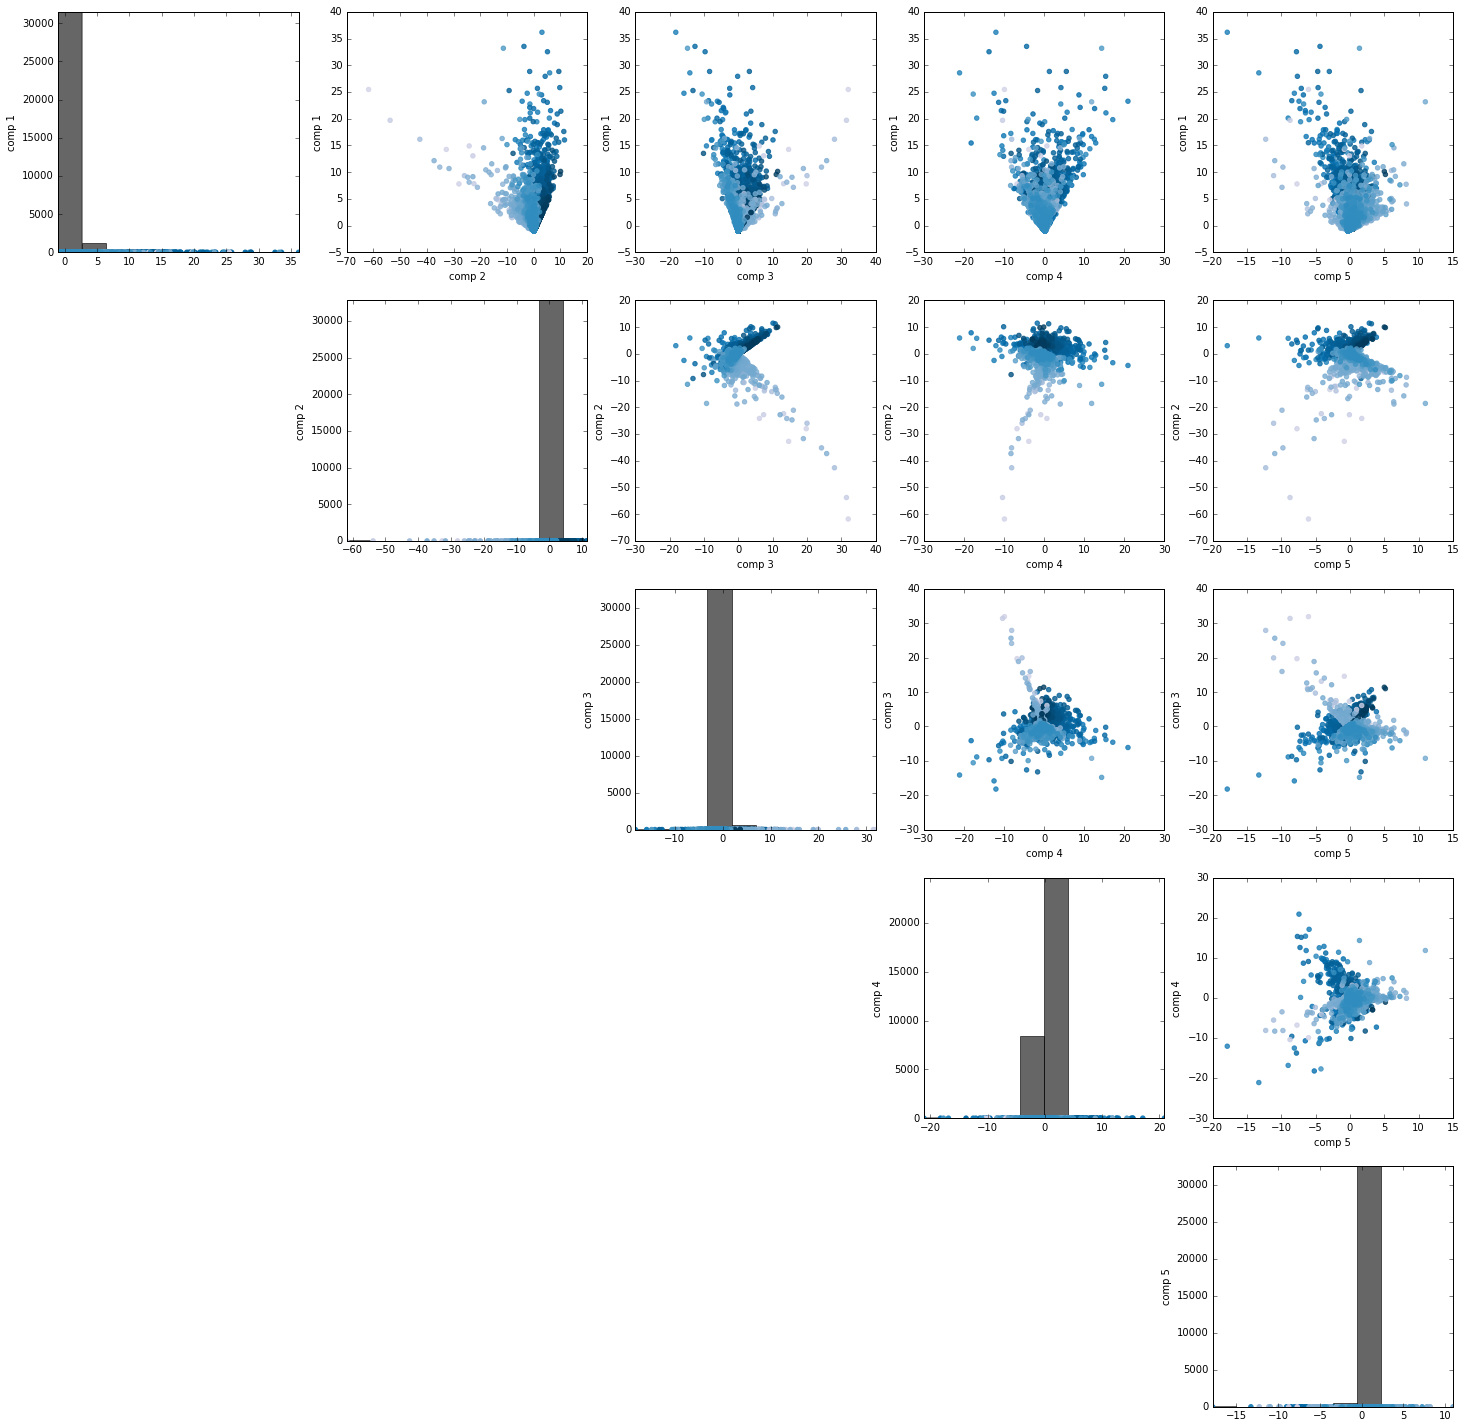

In [114]:
plot_scores(scores, 
            start=1,
            n_comp=5, 
            palette = case_year_colors,
            title='PCA of vertex metrics')

['authority_d', 'indegree_d', 'outdegree_d', 'hubs_d', 'betweenness_d', 'eigen_d', 'pagerank_d']


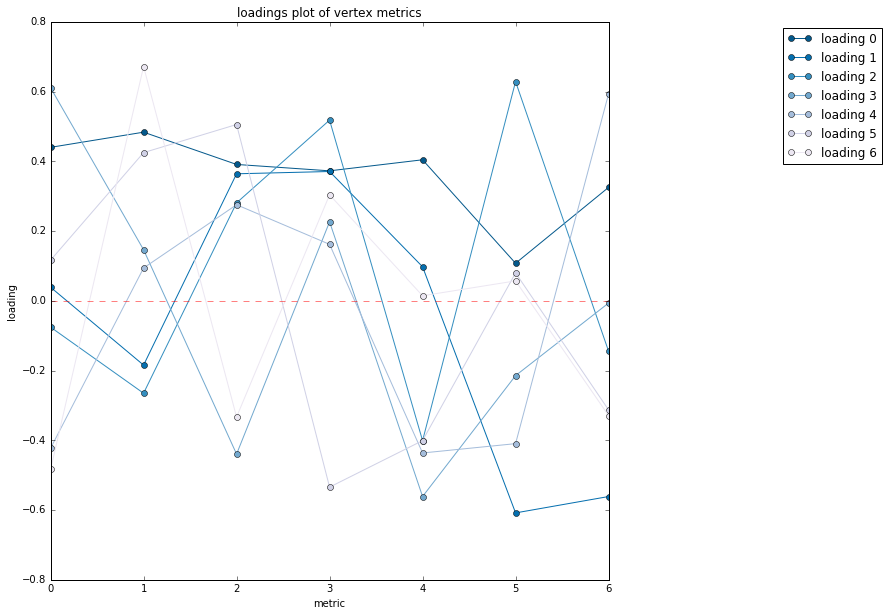

In [128]:
plt.figure(figsize=[10, 10])
plt.title('loadings plot of vertex metrics')
d = len(metrics)
for k in range(d):
    plt.plot(range(d),
             V[k],
             marker='o',
             color=color_palette("PuBu", d)[d-k-1],
             label='loading %d' % k)
    
             # alpha = 1 - (k + 0.0)/d)
plt.axhline(0, ls='--', color='red', alpha=.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.xlabel('metric')
plt.ylabel('loading')

print metrics

(1754, 2016)

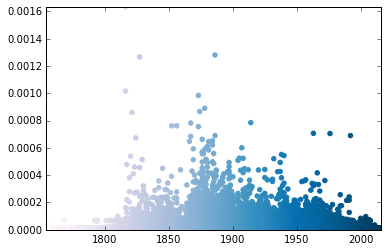

In [116]:
y = case_metrics['pagerank_d']
years = case_metrics['year']
plt.scatter(years,
            y,
            color=case_year_colors)
plt.ylim([0, max(y)])
plt.xlim([min(years), max(years)])

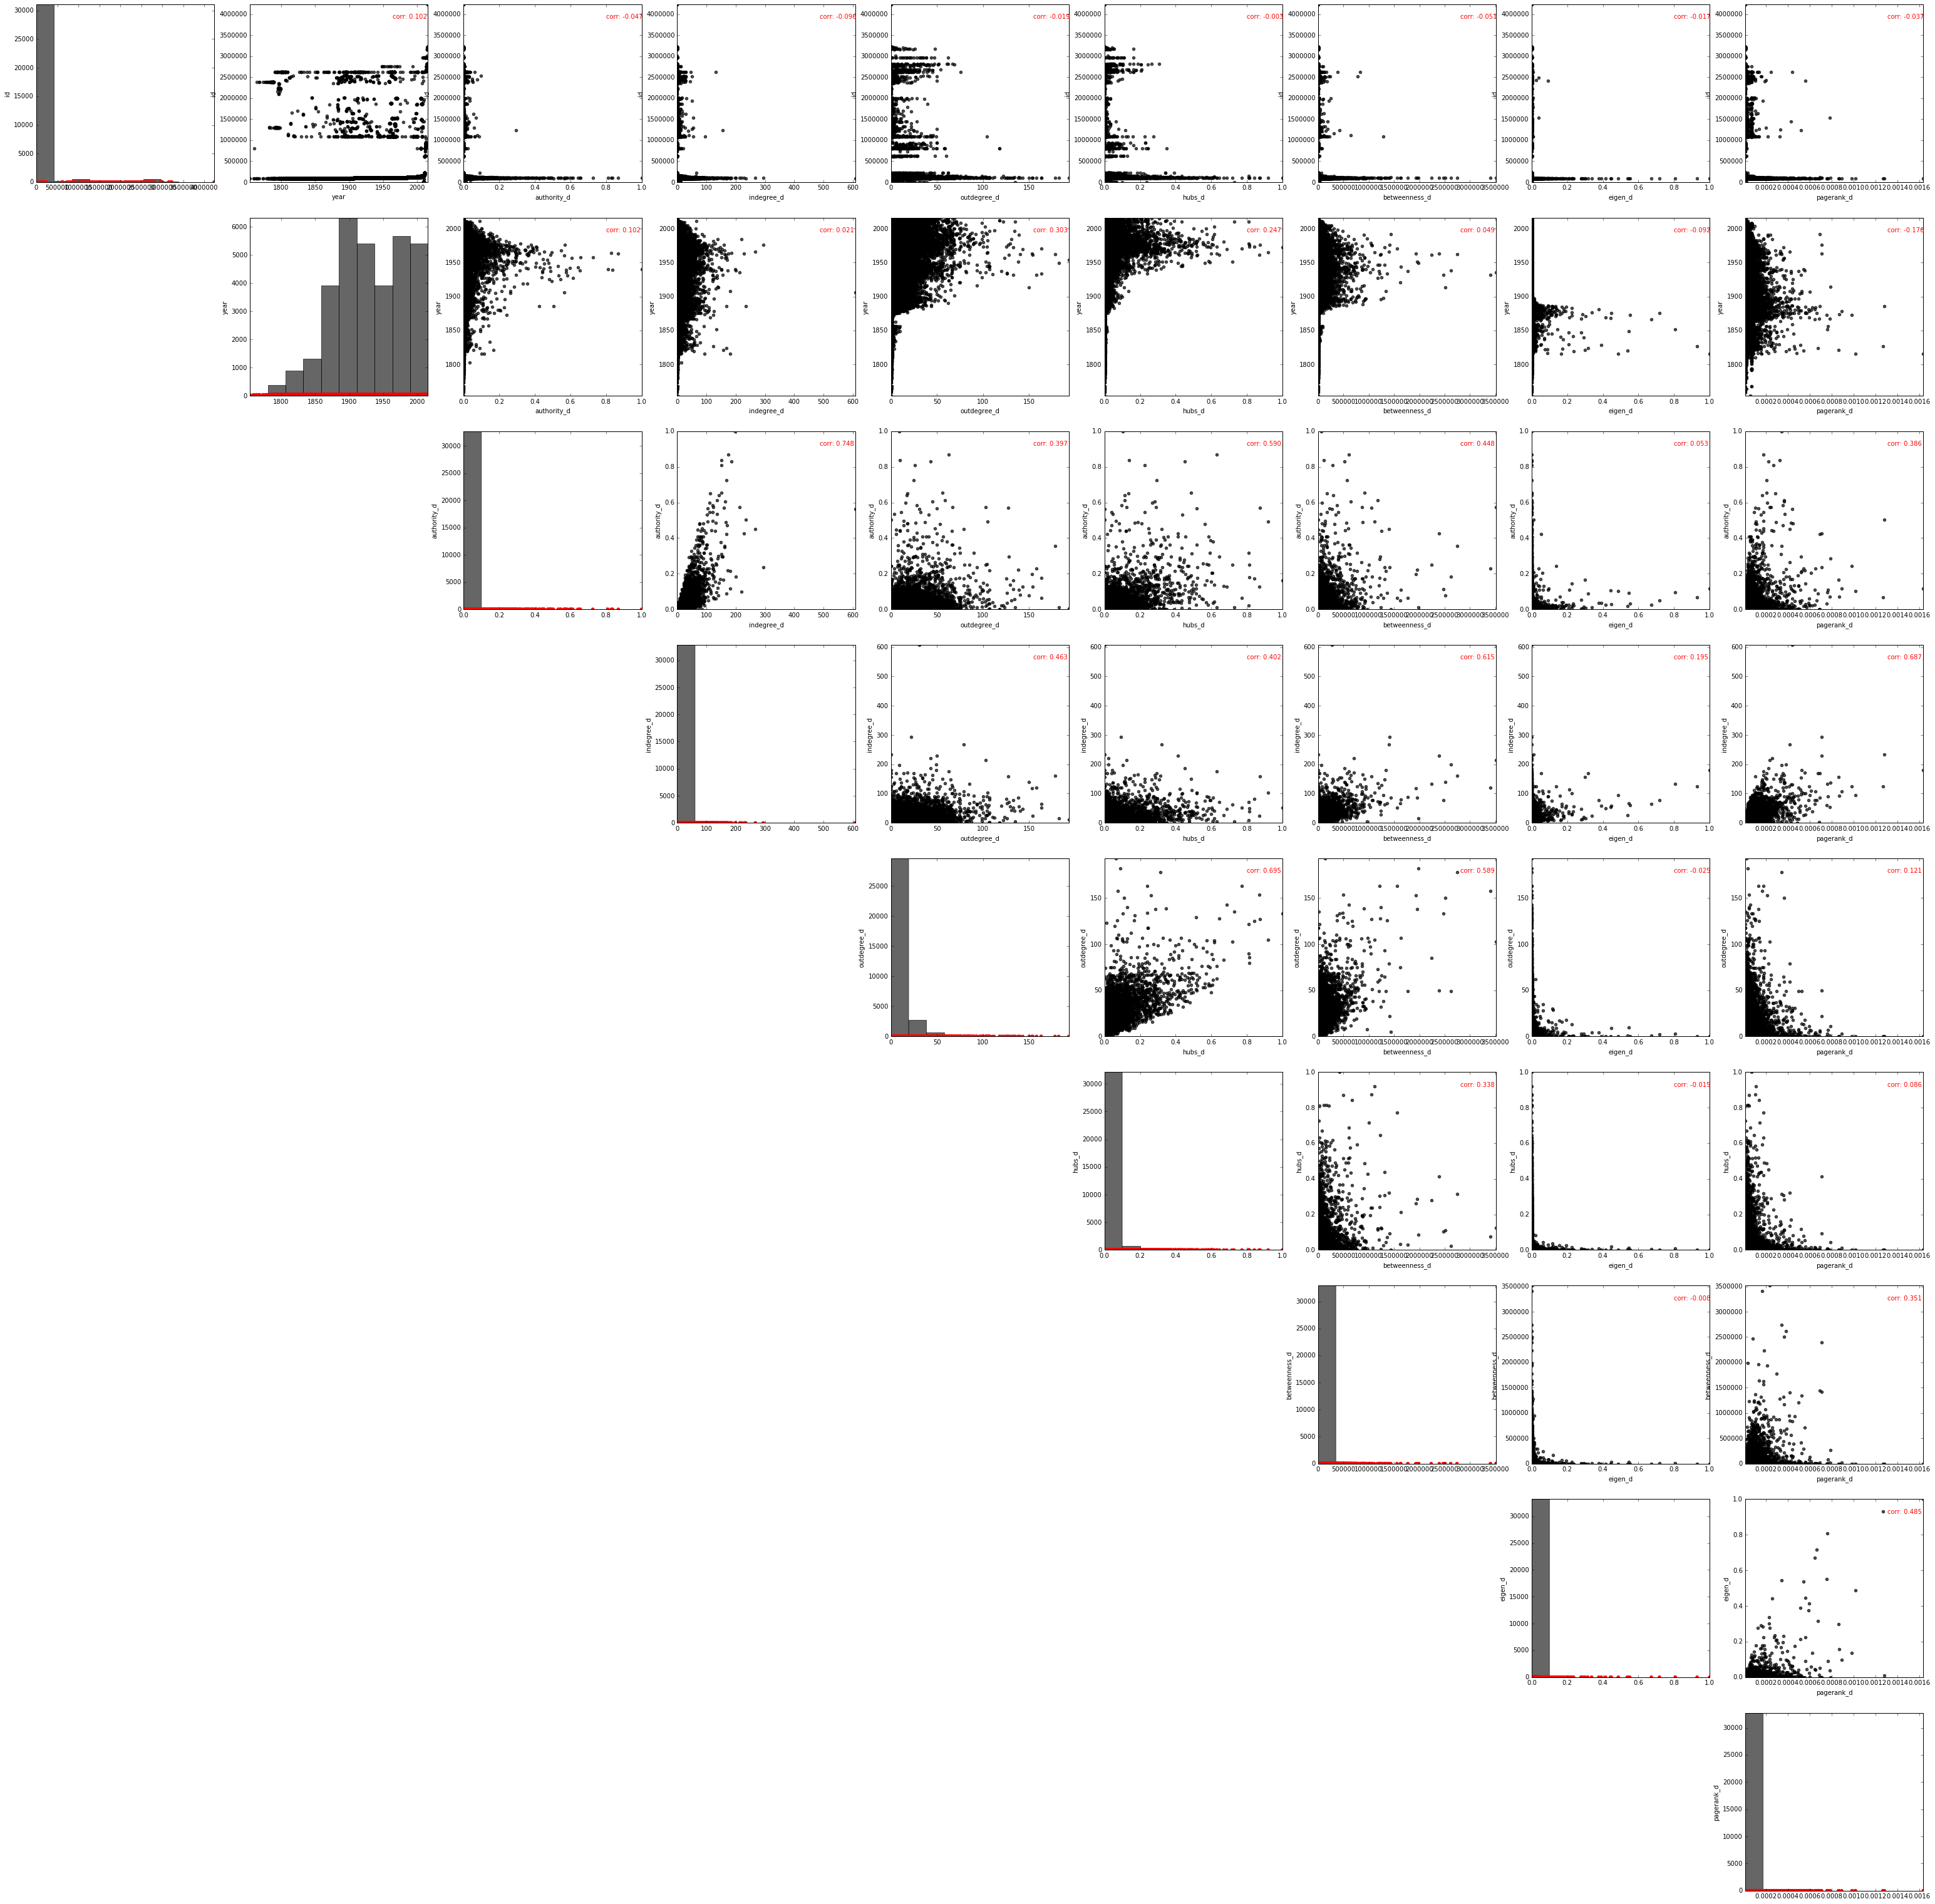

In [127]:
plot_scatter_matrix(case_metrics)